Import Libraries

In [297]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

Explore the data

In [298]:
path_to_data = "/Users/alicja/Desktop/PROJECT/Healthcare-Diabetes.csv"
df = pd.read_csv(path_to_data)

In [299]:
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe().T

The minimum value in the columns should be greater than 0. I'm checking how many cells in a given column have a zero value.

Assumptions:
  "Id" - not needed for this evaluation,
  "Pregnancies" - 0 value is valid data,
  "Outcome" - 0 value is valid data (indicates no diabetes).

In [305]:
data = df.drop(columns=["Id", "Pregnancies", "Outcome"])

num_of_zero_values_per_column = (data == 0).sum()
percentage = round(num_of_zero_values_per_column / len(df.index) * 100, 2)

result = pd.concat([num_of_zero_values_per_column, percentage], axis=1, keys=["Number of rows","Percentage of all rows"])
result.sort_values(by="Percentage of all rows")

,Number of rows,Percentage of all rows
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0


Missing data (value 0) in the 'Glucose,' 'BMI,' and 'BloodPressure' columns make up a small percentage of the data. Therefore, depending on the data distribution, the value of zero will be changed to the mean (in the case of a normal distribution) or the median.

The same strategy has been applied to the 'SkinThickness' column. Despite the missing data percentage being 28.9%, losing such a large amount of data with a relatively small dataset would be unfavorable for further analysis.

The 'Insulin' column will be removed due to the fact that the missing data percentage is almost 50%.


Glucose	18	0.65
BMI	39	1.41
BloodPressure	125	4.52
SkinThickness	800	28.90
Insulin	1330	48.05

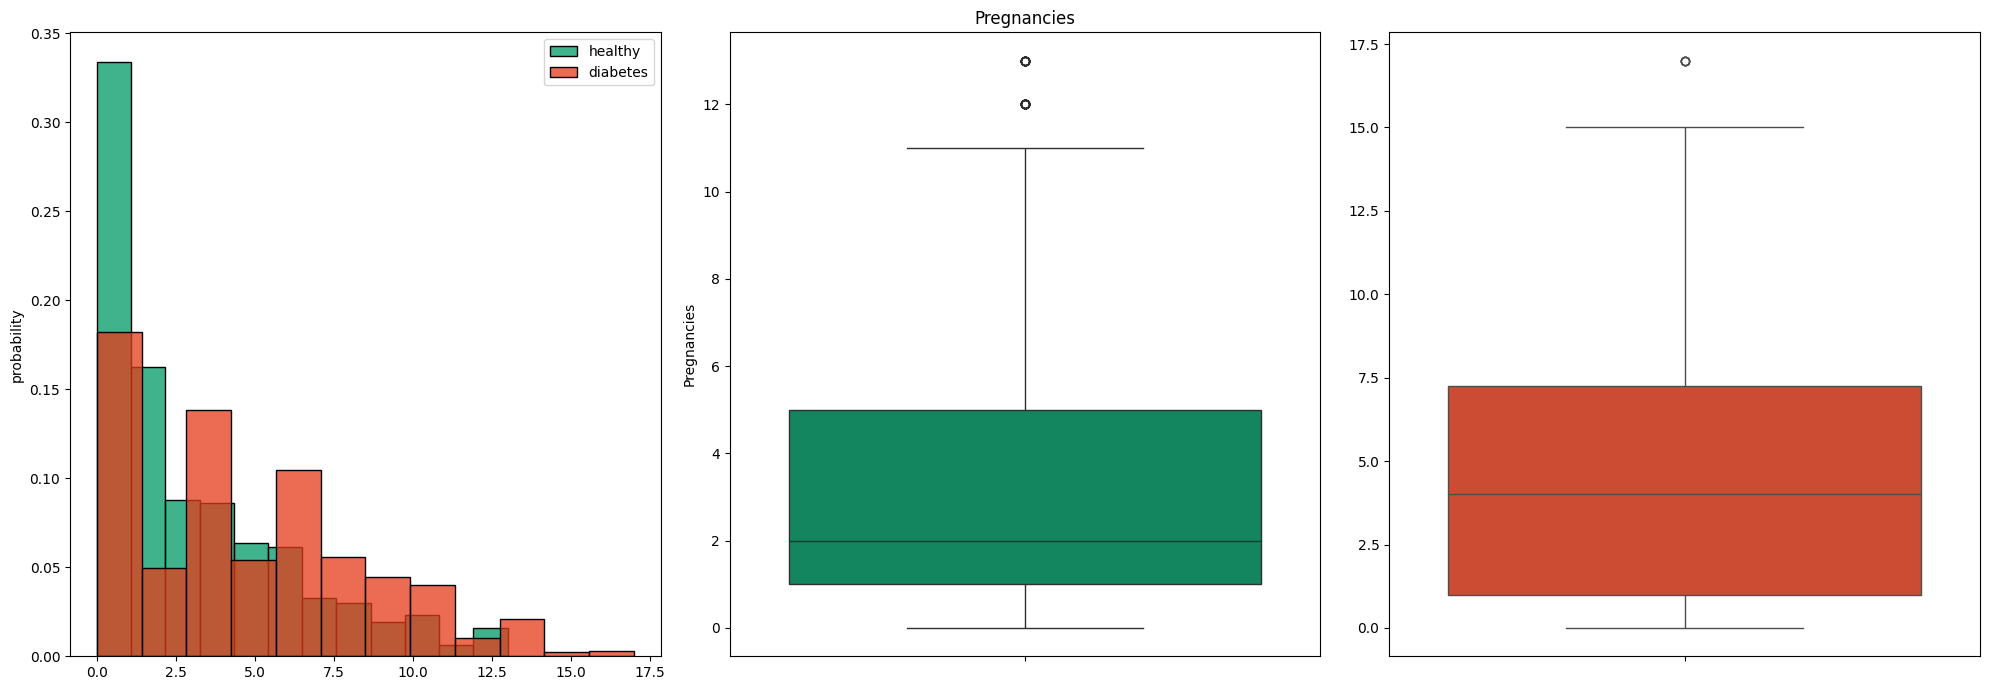

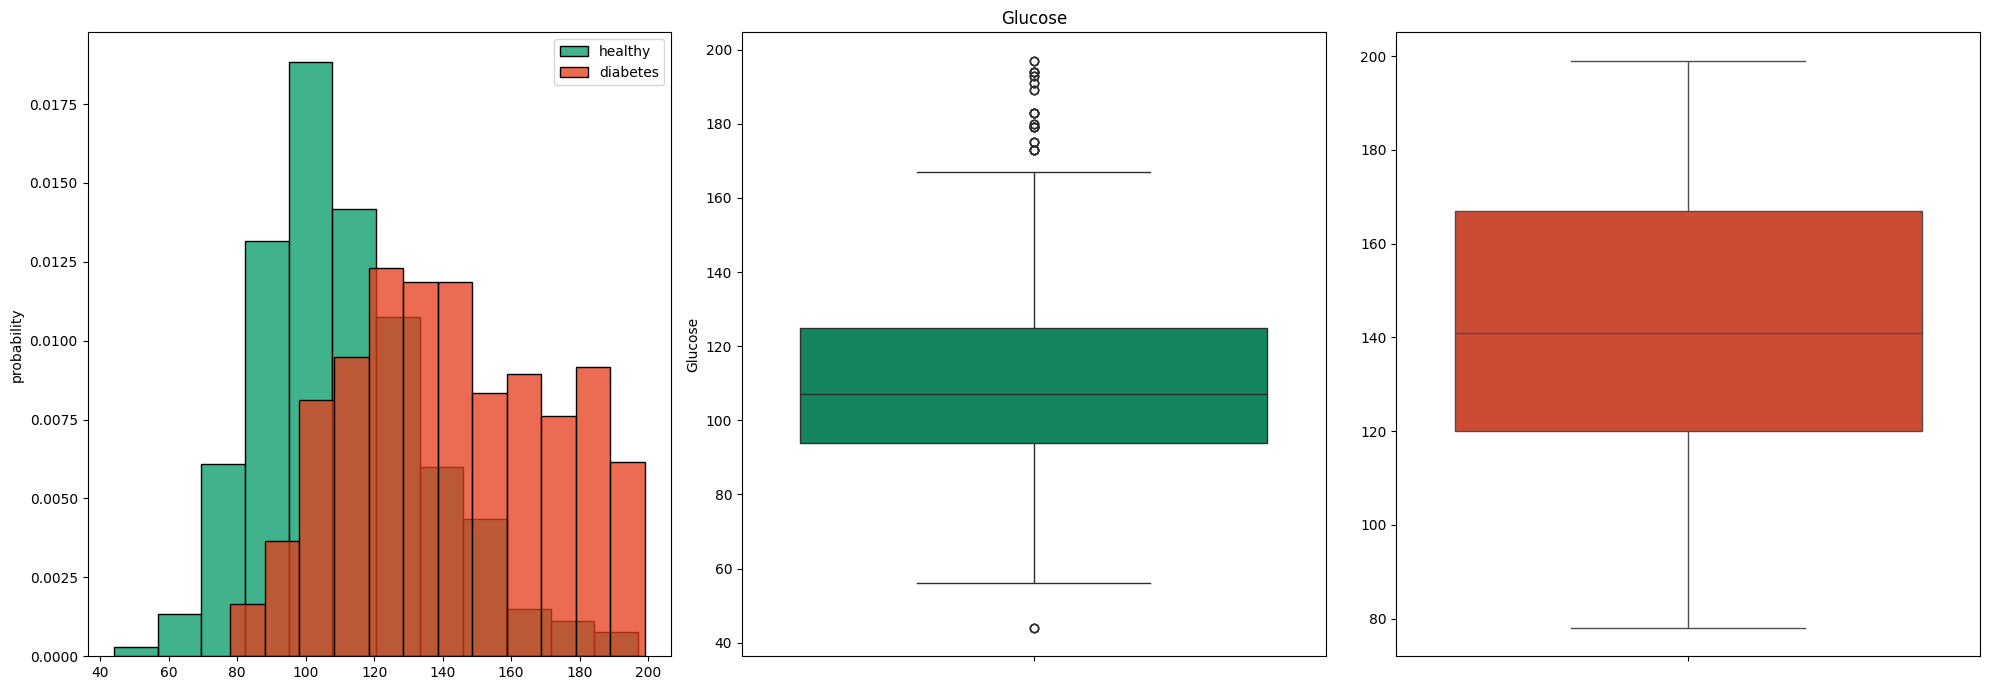

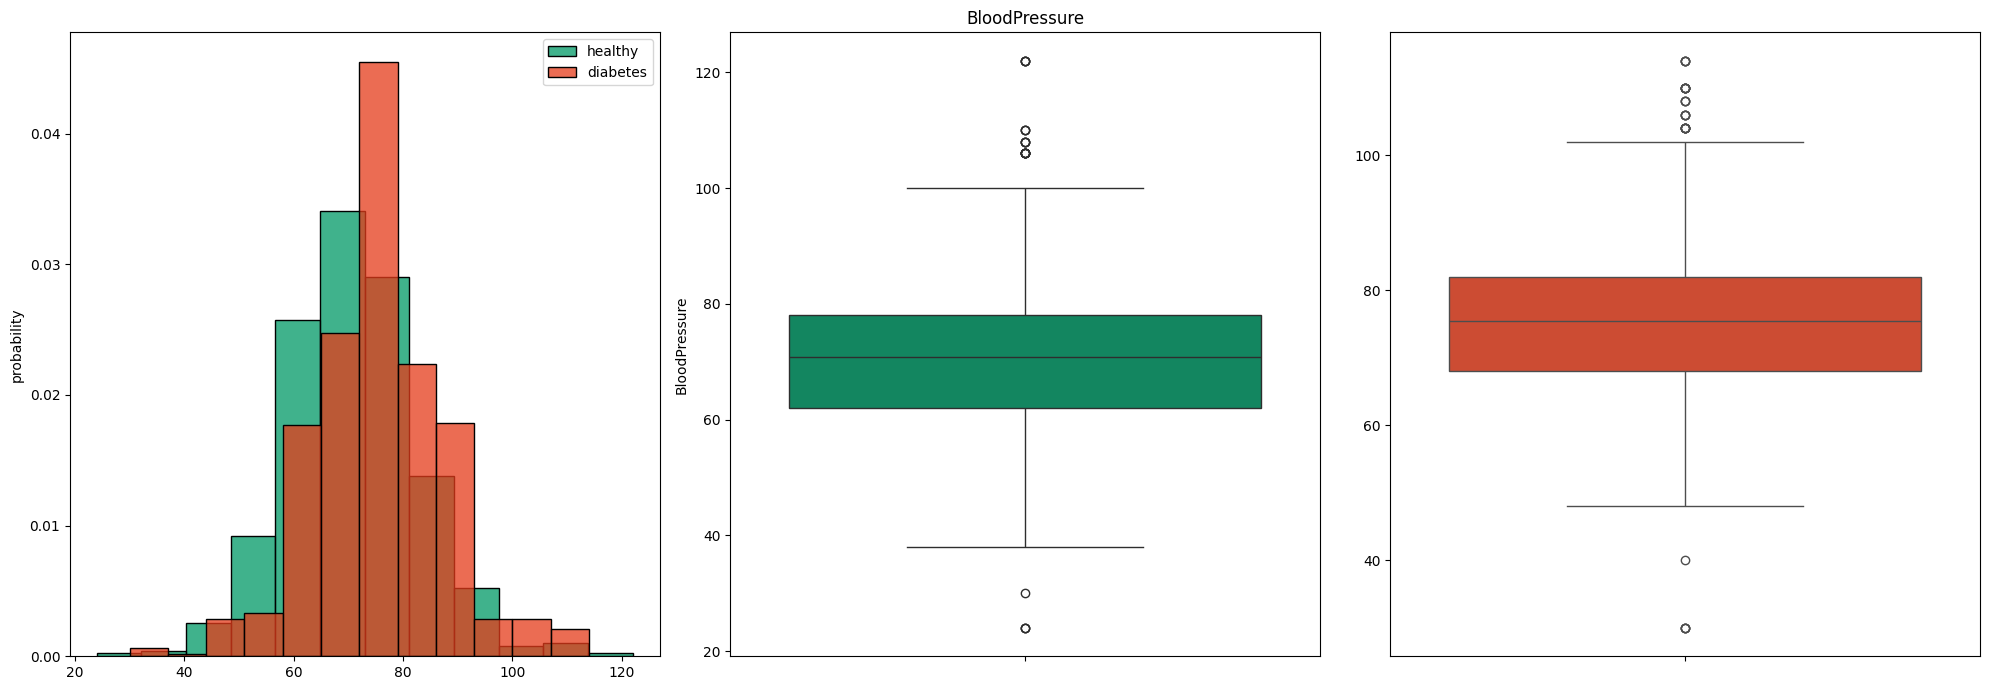

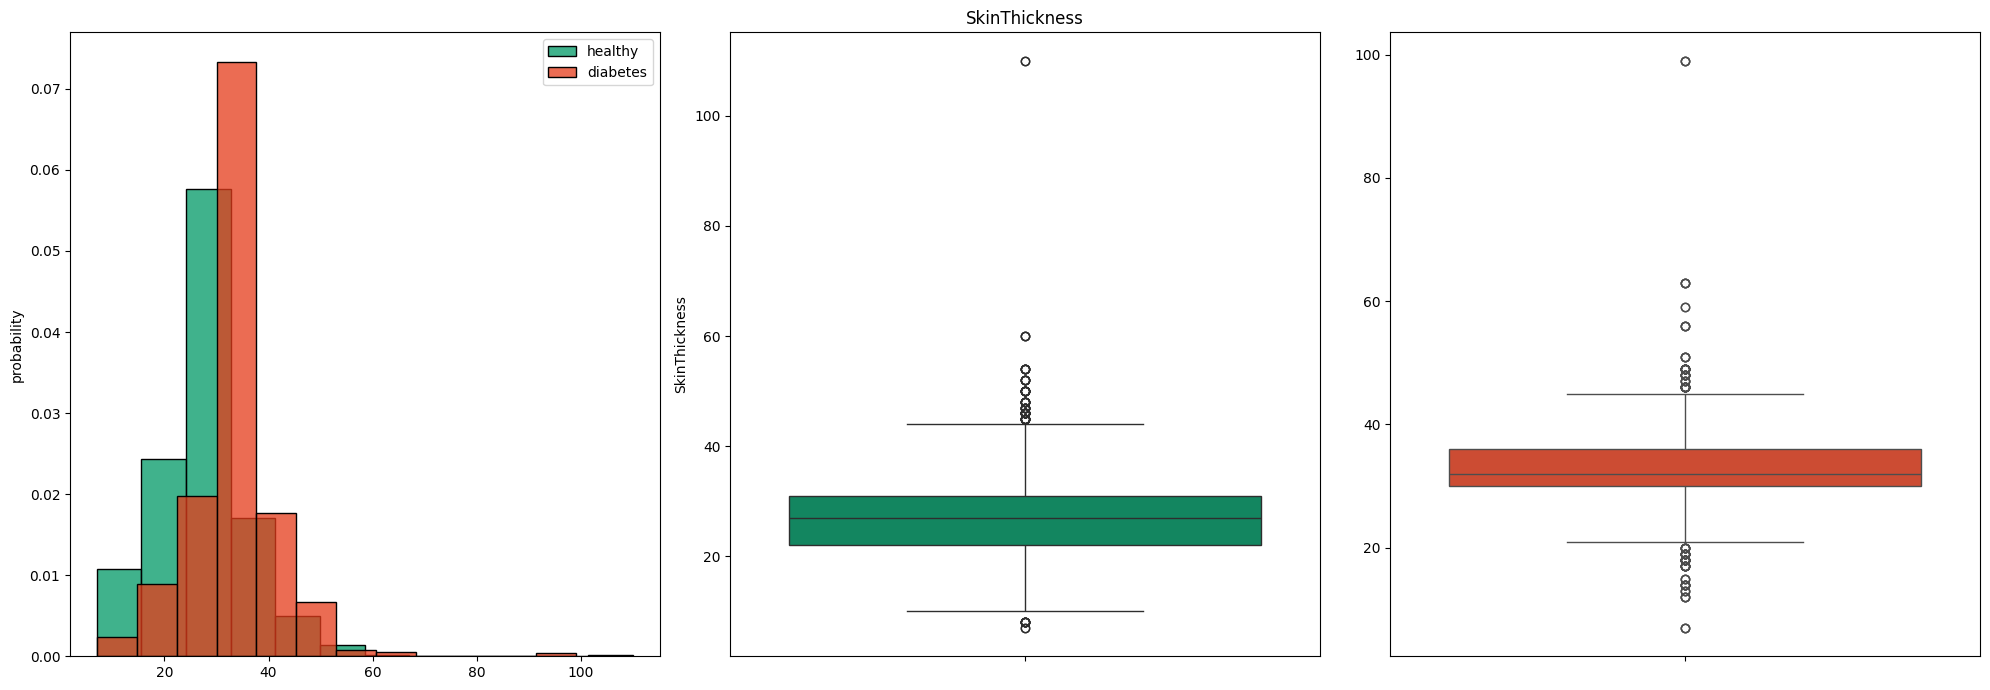

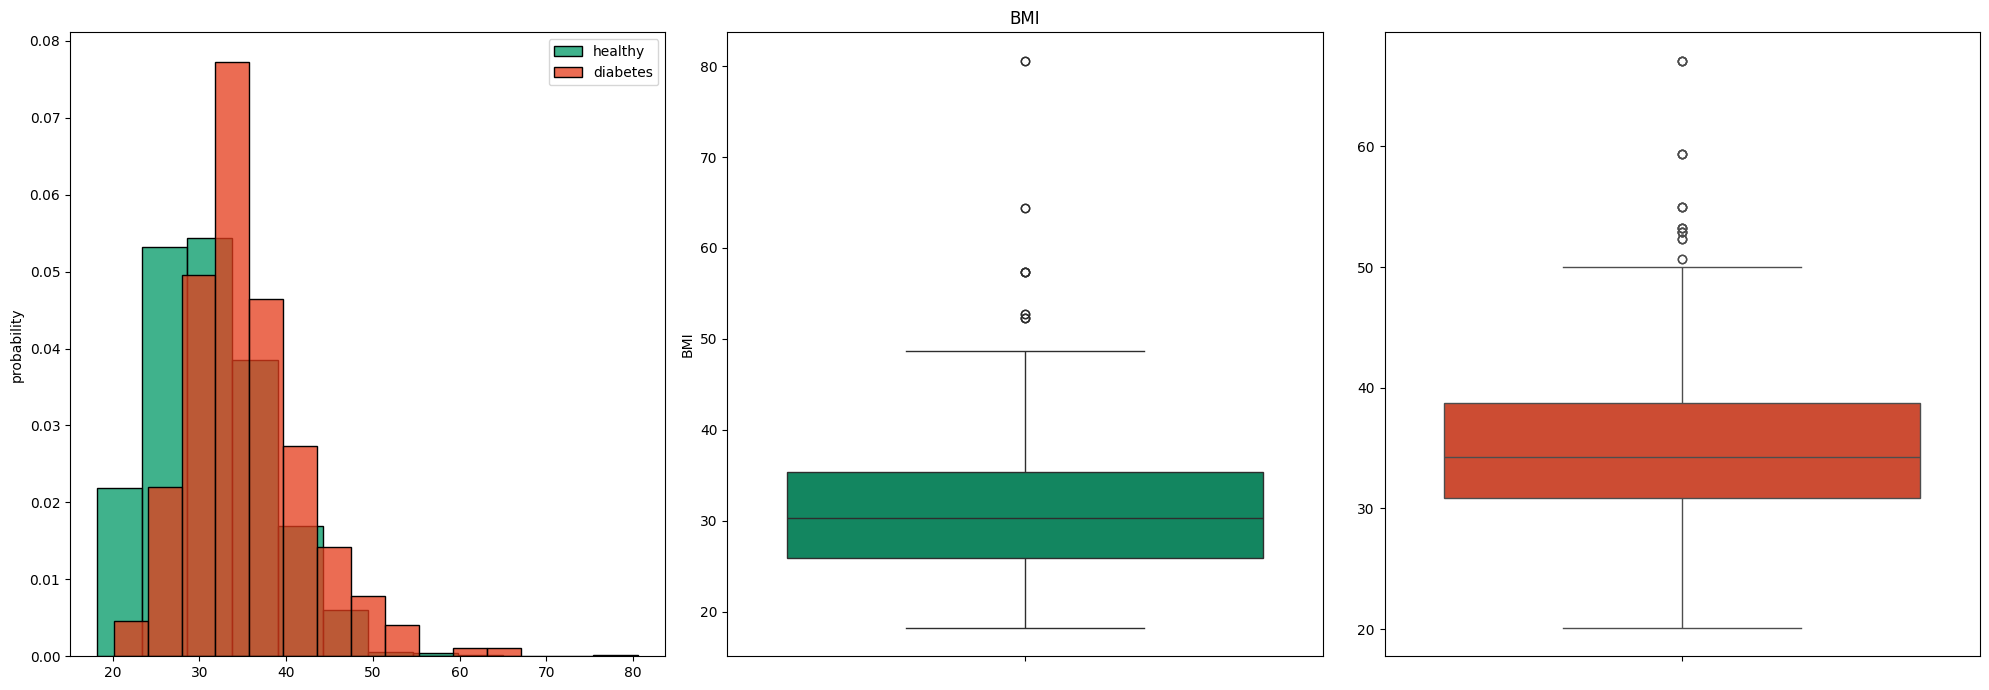

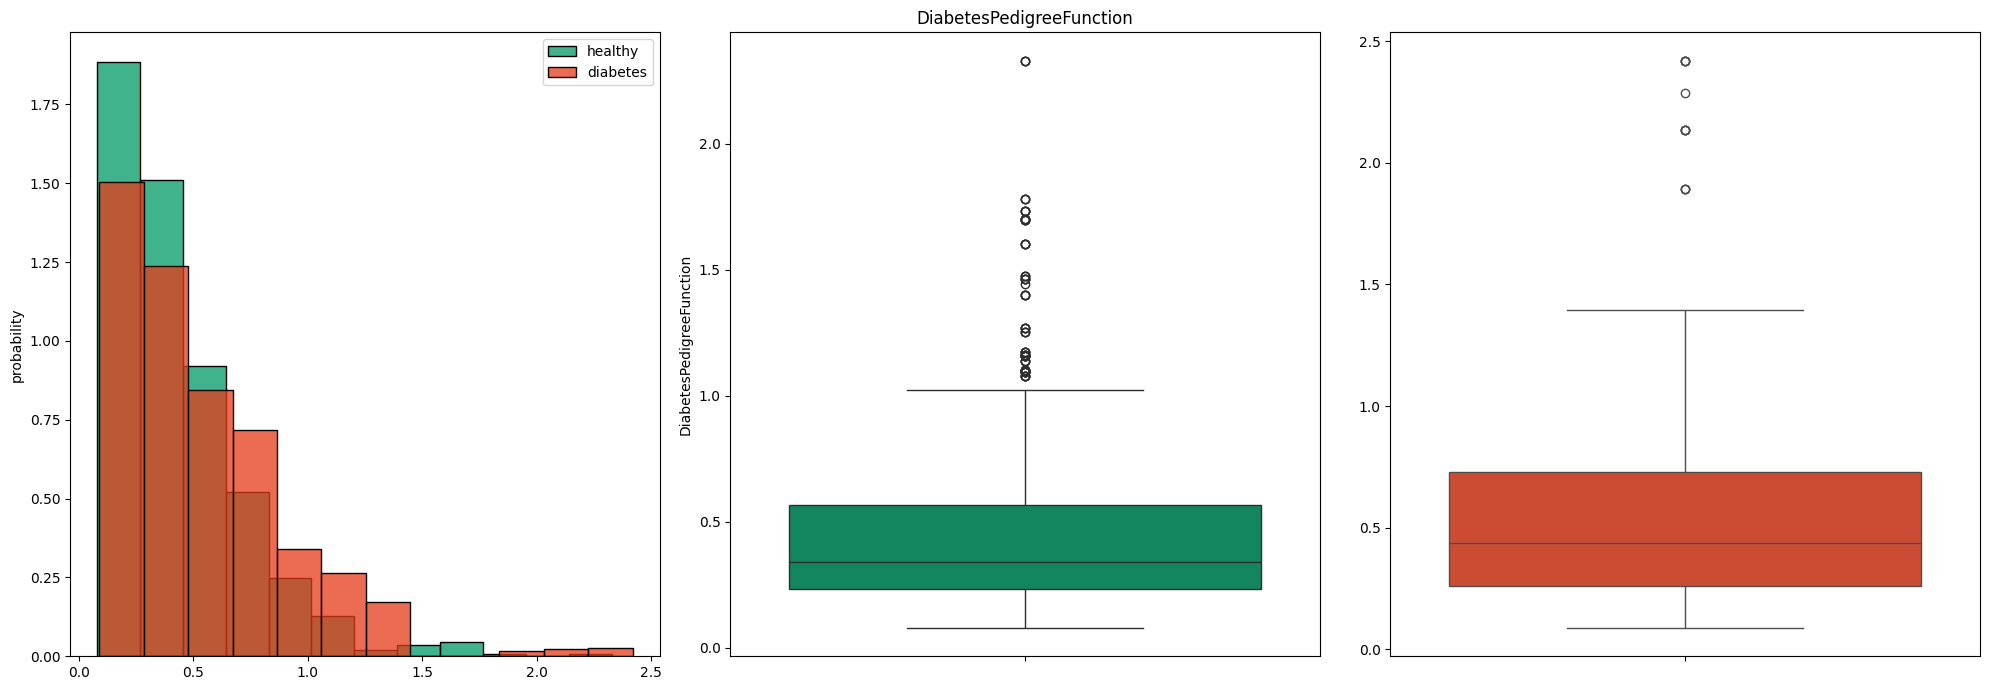

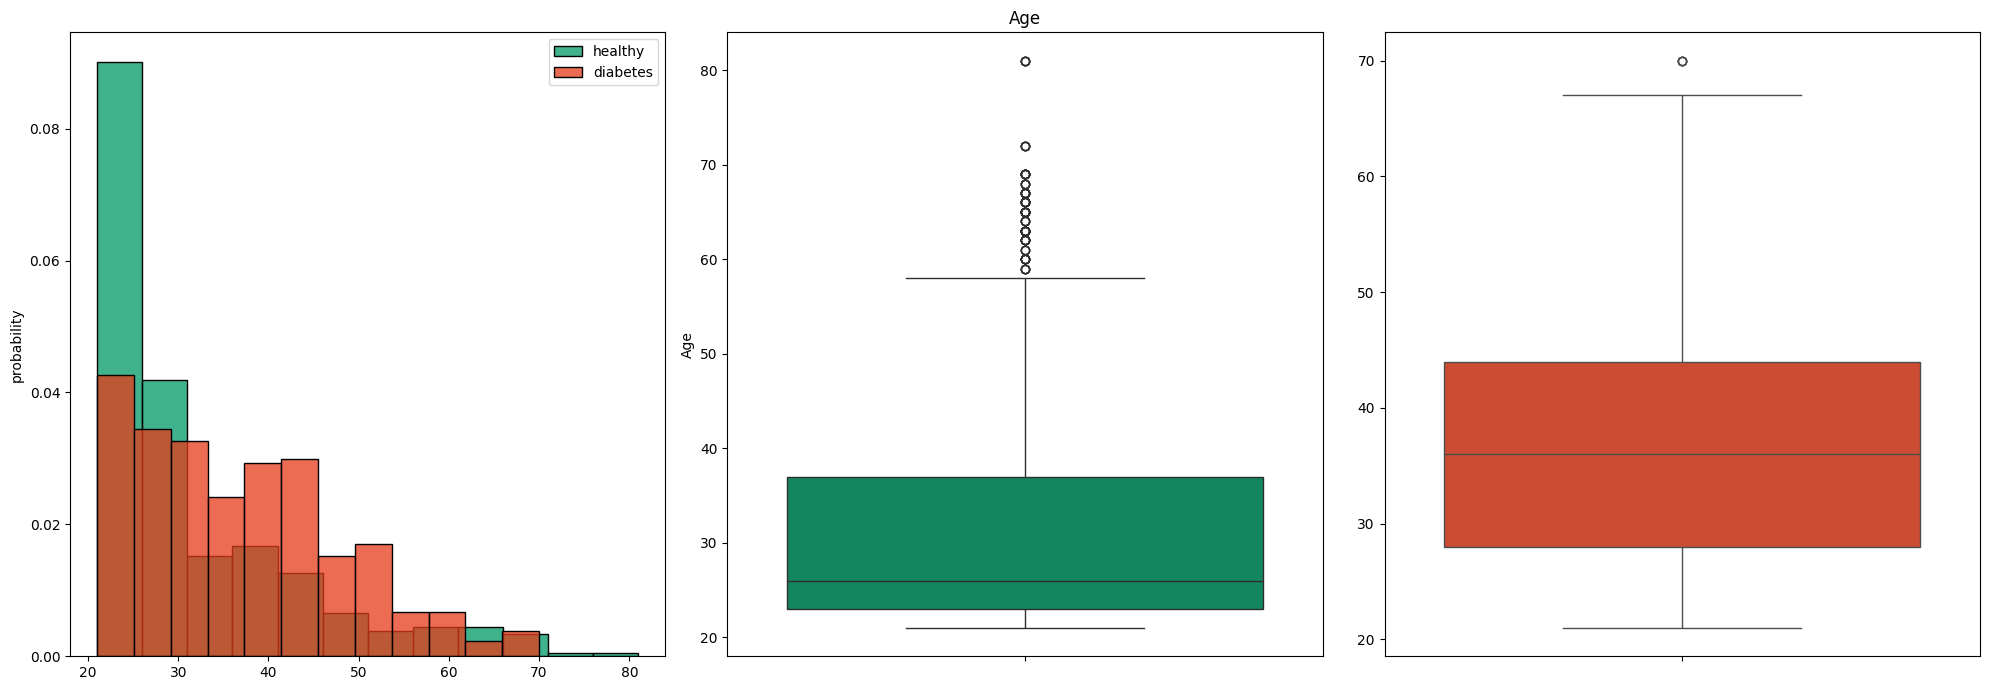

In [306]:
for column in df.drop(columns=["Id", "Outcome"]):
    fig, axs = plt.subplots(1, 3, figsize=(20, 7))
    axs = axs.flatten()

    bins = 25
    if column == "Pregnancies" or "Age":
        bins = 12
   
    sns.histplot(df[df["Outcome"] == 0][column], bins=bins, color="#009966",  label="healthy", stat="density", ax=axs[0])
    sns.histplot(df[df["Outcome"] == 1][column], bins=bins, color="#E53B1A", label="diabetes", stat="density", ax=axs[0])
    
    sns.boxplot(df[df["Outcome"] == 0][column], color="#009966", ax=axs[1])
    sns.boxplot(df[df["Outcome"] == 1][column], color="#E53B1A", ax=axs[2])
    
    axs[1].set_title(column)
    axs[0].set_xlabel("")
    axs[0].set_ylabel("probability")
    #axs[1].set_ylabel("")
    axs[2].set_ylabel("")
    axs[0].legend()
    plt.tight_layout()
    plt.show()

In [302]:
def replace_missing_data_median(column_name):
    for i in range(2):
        median = df[df["Outcome"] == i][column_name][df[column_name] > 0].median()
        cell_to_replace = df[df["Outcome"] == i]["Id"][df[column_name] == 0]

        for id_num in cell_to_replace:
            df.loc[id_num-1, column_name] = median

In [303]:
def replace_missing_data_mean(column_name):
    for i in range(2):
        mean = df[df["Outcome"] == i][column_name][df[column_name] > 0].mean()
        cell_to_replace = df[df["Outcome"] == i]["Id"][df[column_name] == 0]

        for id_num in cell_to_replace:
            df.loc[id_num-1, column_name] = mean

In [304]:
for column in ["Glucose", "BMI", "SkinThickness"]:
    replace_missing_data_median(column)

replace_missing_data_mean("BloodPressure")

df = df.drop(columns="Insulin")

/var/folders/fv/xq0ksdjj6qs_gmxn6yvd1j7c0000gn/T/ipykernel_19023/3479991247.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '70.85051546391753' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[id_num-1, column_name] = mean


In [ ]:
#df.describe().T

In [ ]:
sns.pairplot(data=df, vars=df.columns[1:8], hue="Outcome", palette=["#3B86CB", "#F8C512"])
plt.tight_layout()

In [ ]:
correlation_matrix = df[df.columns[1:]].corr()

fig, ax = plt.subplots(figsize=(6, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

sns.heatmap(correlation_matrix, vmin=0, vmax=1, linewidth=0.5, cmap=cmap, square=True, 
            mask=mask, cbar_kws={"shrink": 0.55} )

In [ ]:
correlation_matrix.drop("Outcome")

In [ ]:
correlation_between_features = (correlation_matrix.where(np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1))
                                .stack()
                                .sort_values(ascending=False))

print(f"The top 10 highest correlation coefficients between individual features: \n\n{correlation_between_features.nlargest(10)}")

In [ ]:
plt.figure(figsize=(12, 8))
color = sns.color_palette("crest", 28)
color.reverse()
correlation_between_features.plot.barh(color=color, width=0.75).invert_yaxis()
plt.tight_layout()

In [ ]:
corr_with_outcome = correlation_matrix.drop("Outcome")["Outcome"].sort_values(ascending=False)
print(f"Correlation coefficient of individual features with the target: \n\n{corr_with_outcome}")

In [ ]:
plt.figure(figsize=(8, 3))
color = sns.color_palette('crest', 7)
color.reverse()
corr_with_outcome.plot.barh(color=color).invert_yaxis()
plt.tight_layout()

In [ ]:
outcome_count = df['Outcome'].value_counts()

outcome_count.plot(kind="pie",
                    title="Ratio of people without diabetes \n to people with diabetes",
                    labels=["healthy", "diabetes"], 
                    ylabel="",
                    colors=["#009966", "#E53B1A"], 
                    explode=[0, 0.1], 
                    shadow=True, 
                    autopct='%1.1f%%', 
                    radius=1, 
                    wedgeprops={"edgecolor": "black"})

plt.tight_layout()
plt.show()